In [1]:
import numpy as np
import math 
import random
from numpy import linalg 
from numpy import real
from scipy import linalg, matrix
from sympy import Matrix
A={0:(0,1), 1:(2,3), 2:(0,2), 3:(0,3), 4:(1,2), 5:(1,3)}

kex=3
kin=0.5


def distance(X1,X2):
	Sum=0.0
	for i in range(len(X1)):
		Sum=Sum+(X1[i]-X2[i])*(X1[i]-X2[i])
	return math.sqrt(Sum/len(X1))

### Sorting things ### 
def getKey(item):
    return item[0]


### Generating all sets of states, 00, 01, 10, 11  ### 
def OrderSets():
#	List=[0]*6
	Allset=[]
	List=[]
#	Allset.append(List)
#	print Allset
	NewSet=[]
	Set(Allset,List,0)
	for i in range(len(Allset)):
#		print list(reversed(Allset[i]))
		NewSet.append(Allset[i])
#		print Allset[i]
#		NewSet.append(list(reversed(Allset[i])))
#	print list(reversed(NewSet))
	return NewSet
#	return NewSet



## Generating all sets of states 00, 10, 01, 11 ##
def AllSets():
#	List=[0]*6
	Allset=[]
	List=[]
#	Allset.append(List)
#	print Allset
	NewSet=[]
	Set(Allset,List,0)
	for i in range(len(Allset)):
#		print list(reversed(Allset[i]))
#		print Allset[i]
		NewSet.append(list(reversed(Allset[i])))
#	print list(reversed(NewSet))
	return NewSet

def Set(Allset,List,index):
#	print index
	if len(List)==6:
		Allset.append(List)
	else:
		for i in range(2):
			Set(Allset,List+[i],index+1)
## Indexing the states ## 

## Indexing the states ## 
def state(N1):
	N=list(reversed(N1))
	L=2**N[0]
	for i in range(1,len(N)):
		L=L+N[i]*(2**((i)*N[i]))
	return L-1



## Measuring transition probability ##
def stay(N1,k):
	L1=state(N1)
	prob=0
	if k[0]==kin:
		prob=prob+1
	if k[1]==kin:
		prob=prob+1
	if k[2]==kex:
		prob=prob+1
	if k[3]==kex:
		prob=prob+1
	prob=float(format(prob,'.5f'))
	if prob==0:
		prob=0
	return (L1,prob)

def Tran(N1,N2,k):
	prob=0
	L1=state(N1)
	L2=state(N2)

	index=[]
	for i in range(len(N1)):
		if N1[i]!=N2[i]:
                        prob=0
#			index.append(i)
			if N1[i]==0:
#				print i
				if i in range(2,6):
					(x,y)=A[i]
					prob=1.0/(3-k[y])
                                        if k[x]==0:
                                            prob=prob+1.0/(3-k[x])

				if i==0:
                                        prob=0
					(x,y)=A[i]
                                        if k[x]==0:
                                            prob=prob+1.0/(3-k[x])
                                        if k[y]==0:
					    prob=prob+1.0/(3-k[y])
				if i==1:
					(x,y)=A[i]	
#					print A[i]				
					prob=1.0/(3-k[y])+1.0/(3-k[x])
#					print prob

			else:
				if i in range(2,6):
					(x,y)=A[i]
                                        if k[x]!=0:
					    prob=1.0/(k[x])

				if i==0:
					(x,y)=A[i]
#					print(x,y)
#					print(k[x],k[y])					
					prob=1.0/(k[y])+1.0/(k[x])

				if i==1:
					prob=0
	prob=float(format(prob,'.2f'))
	if prob==0:
		prob=0
	return (L2,prob)



## Measuring the row related state N1 in W matrix ## 
def Nb(N1, W):
	L1=state(N1)
	Neig=[]
	k=[0]*4
#	Neig.append(N1)
	for i in range(len(N1)):
		Neig.append(N1[:i]+[1-N1[i]]+N1[i+1:])

	k[0]=N1[0]+N1[2]+N1[3]
	k[1]=N1[0]+N1[4]+N1[5]
	k[2]=N1[2]+N1[4]+N1[1]	
	k[3]=N1[3]+N1[5]+N1[1]	

	Grand=[]
	Grand.append(stay(N1,k))
	for i in Neig:
		Z=Tran(N1,i,k)
		Grand.append(Z)
	Grand1=sorted(Grand,key=getKey)	
	s=''
	for i in range(len(Grand1)-1):
		(x,y)=Grand1[i]
		W[L1][x]=y
		s=s+'('+str(L1)+','+str(x)+') = '+str(y)+'&'
	(x,y)=Grand1[len(Grand1)-1]
	W[L1][x]=y	
	s=s+'('+str(L1)+','+str(x)+') = '+str(y)+" \\"	
	s=s+"\\"
#	print s

	s1="Transition from state " +str(L1)+", "+"$"+str(N1)+"$:"
#	print s1

	s2="\\begin{equation} \\nonumber \n"+"W("+str(L1)+",:)=c\n"+"\\begin{pmatrix}\n"
	s3=s+"\n"+"\end{pmatrix} \n"+"\end{equation} \n"

	S=s1+"\n"+s2+s3

## returning W matrix ## 

def WMatrix():
	W=np.zeros((64, 64))
	New=OrderSets()
	for i in New:
		Nb(i, W)
	return W 


## Printing W Matrix in Latex Format ## 

def printZeroIndex(W, size):
	s=''
	for i in range(0,size):
		for j in range(0,size):
                        W[i,j]=float(format(W[i,j],'.5f'))
                        
#			print W[i,j]
			if W[i,j]==1.0:
#				print W[i][j]
				wxy="1"						
			elif W[i,j]==0.0:
				wxy="0"			
			elif W[i,j]==0.33:
				wxy="\\frac{1}{3}"
			elif W[i,j]==1.5:
				wxy="\\frac{3}{2}"
			elif W[i,j]==2.0:
				wxy="2"
			elif W[i,j]==0.83:
				wxy="\\frac{5}{6}"				
			elif W[i,j]==0.67:
				wxy="\\frac{2}{3}"
			elif W[i,j]==1.33:
				wxy="\\frac{4}{3}"
			elif W[i,j]==0.5:
				wxy="\\frac{1}{2}"
			else:
				wxy=str(W[i,j])
			if j!=size-1:
				s=s+wxy+"&"								
			else:
				s=s+wxy+" \\"+"\\"+"\n"
	print s


'''
			if W[i][j]==0.0:
				wxy="0"			
			elif W[i][j]==0.33:
				wxy=" \\frac{1}{3} "
			elif W[i][j]==1.33:
				wxy=" \\frac{4}{3} "
			elif W[i][j]==0.5:
				wxy=" \\frac{1}{2} "
			else:
'''				


#print OrderSets()

#print AllSets()
W= WMatrix()

print W[16,19]
print W[19,16]
#AllSets()
#print W
B=np.matrix(W)
A=B.T
#print A[16,16]
#printZeroIndex(A[16:32,16:32],16)
#for i in range(16,32):
#	for j in range(16,32):
#		print(i-15,j-15,A[i,j])
#	print "####"

C=A
#A = np.matrix([[0.25,0.25,0.5] , [0.1,0.8,0.1] , [0.6,0.3,0.1]])
#B = np.matrix([[0.25,0.25,0.5] , [0.1,0.8,0.1] , [0.6,0.3,0.1]])
#print B
X0 = np.random.random((64,1))
#X0=np.matrix(X0)
iterations = 20000
#print X0
for i in range (iterations):
	y = A*X0
#	print y
#	print max(y)
	X1=y/max(y)
	A = A*A		
	if distance(X1,X0) < 10**-8:
#		print i
		break
	X0=X1	

#print max(y)
#print X0
Sum=sum(X0)
X0= X0/Sum
#print sorted(X0)
'''
Sets=OrderSets()
Sum=0
for i in range(len(X0)):
	if X0[i] < 0.00001:
		Z=0
#	        print(i+1,Sets[i],0)
	else:
		prob=float(format(X0.item(i),'.5f'))
                print prob 
                Sum=Sum+prob
#               print Sum
#		print(i+1,Sets[i],prob)
print Sum
F=np.zeros((32,32))#,np.dtype('float64'))
#print 
List=[i for i in range(16,32)]
List1=[i for i in range(48,64)]
List=List+List1
print len(List)
for i in range(len(List)):
    for j in range(len(List)):
        F[i,j]=C[List[i],List[j]]*X0[List[j]]-C[List[j],List[i]]*X0[List[i]]
        


#print F
printZeroIndex(F,32)
#print Sum
#print max(y)
#X=C*X0
#print distance(X0,Xvi )
#print X
#print max(y)
#print X
#print B*X
#print max(y)

#print B
#print A
'''


#printZeroIndex(W,64)


0.0
0.0


"\nSets=OrderSets()\nSum=0\nfor i in range(len(X0)):\n\tif X0[i] < 0.00001:\n\t\tZ=0\n#\t        print(i+1,Sets[i],0)\n\telse:\n\t\tprob=float(format(X0.item(i),'.5f'))\n                print prob \n                Sum=Sum+prob\n#               print Sum\n#\t\tprint(i+1,Sets[i],prob)\nprint Sum\nF=np.zeros((32,32))#,np.dtype('float64'))\n#print \nList=[i for i in range(16,32)]\nList1=[i for i in range(48,64)]\nList=List+List1\nprint len(List)\nfor i in range(len(List)):\n    for j in range(len(List)):\n        F[i,j]=C[List[i],List[j]]*X0[List[j]]-C[List[j],List[i]]*X0[List[i]]\n        \n\n\n#print F\nprintZeroIndex(F,32)\n#print Sum\n#print max(y)\n#X=C*X0\n#print distance(X0,Xvi )\n#print X\n#print max(y)\n#print X\n#print B*X\n#print max(y)\n\n#print B\n#print A\n"

In [2]:
print AllSets()
# Steady state X0 
print X0

[[0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0], [1, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0], [1, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0], [1, 1, 1, 0, 1, 0], [0, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0], [0, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0], [0, 0, 1, 1, 1, 0], [1, 0, 1, 1, 1, 0], [0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1], [1, 1, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1], [1, 1, 1, 0, 0, 1], [0, 0, 0, 1, 0, 1], [1, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1], [0, 1, 1, 1, 0, 1], [1, 1, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1],

In [3]:
#print W.shape[:]
print printZeroIndex(W,64)

0&\frac{2}{3}&\frac{2}{3}&0&\frac{2}{3}&0&0&0&\frac{2}{3}&0&0&0&0&0&0&0&\frac{2}{3}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{2}{3}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
1&0&0&\frac{1}{3}&0&\frac{5}{6}&0&0&0&\frac{2}{3}&0&0&0&0&0&0&0&\frac{5}{6}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{3}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
1&0&0&\frac{1}{3}&0&0&\frac{2}{3}&0&0&0&\frac{5}{6}&0&0&0&0&0&0&0&\frac{5}{6}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{3}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&\frac{1}{2}&\frac{1}{2}&0&0&0&0&\frac{5}{6}&0&0&0&\frac{5}{6}&0&0&0&0&0&0&0&1&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{3}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
1&0&0&0&0&\frac{5}{6}&\frac{2}{3}&0&0&0&0&0&\frac{1}{3}&0&0&0&0&0&0&0&\frac{5}{6}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{3}&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&1&0&0&1&0&0&\frac{1}{3}&0&0&0&0&0&\frac{1}{3}&0&0&0&0&0&0&0&\frac{4}{3}&0&0&0&0&0&0

In [4]:
X1=[]

for i in X0:
    if i < 10**-15:
        X1.append(0)
    else:
        X1.append(float(i))
#Min=min(X1)


In [5]:
print X1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.04783730051647569, 0.04217870773044293, 0.04217870773044293, 0.046052078623592584, 0.04217870773044293, 0.06143544800909643, 0.03476898495085823, 0.0664945155859005, 0.04217870773044293, 0.03476898495085823, 0.06143544800909643, 0.06649451558590051, 0.04605207862359259, 0.06649451558590051, 0.06649451558590051, 0.13662622054910165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.011232899249381473, 0.006420511160973282, 0.006420511160973282, 0.006675408904469953, 0.006420511160973282, 0.005399975064575349, 0.0024422478432016177, 0.005060415206773227, 0.006420511160973281, 0.0024422478432016177, 0.005399975064575351, 0.0050604152067732265, 0.006675408904469954, 0.0050604152067732265, 0.0050604152067732265, 0.010138694157093302]


In [6]:
Sets=OrderSets()
Sum=0
for i in range(len(X0)):
	if X0[i] < 0.00001:
		Z=0
#	        print(i+1,Sets[i],0)
	else:
		prob=float(format(X0.item(i),'.5f'))
                print prob 
                Sum=Sum+prob
#               print Sum
#		print(i+1,Sets[i],prob)
print Sum
F=np.zeros((32,32))#,np.dtype('float64'))
#print 
List=[i for i in range(16,32)]
List1=[i for i in range(48,64)]
List=List+List1
print len(List)
for i in range(len(List)):
    for j in range(len(List)):
        F[i,j]=C[List[i],List[j]]*X0[List[j]]-C[List[j],List[i]]*X0[List[i]]
        


#print F
printZeroIndex(F,32)



0.04784
0.04218
0.04218
0.04605
0.04218
0.06144
0.03477
0.06649
0.04218
0.03477
0.06144
0.06649
0.04605
0.06649
0.06649
0.13663
0.01123
0.00642
0.00642
0.00668
0.00642
0.0054
0.00244
0.00506
0.00642
0.00244
0.0054
0.00506
0.00668
0.00506
0.00506
0.01014
1.0
32
0&0.00247&0.00247&0&0.00247&0&0&0&0.00247&0&0&0&0&0&0&0&-0.00959&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
-0.00247&0&0&0.00194&0&0.00534&0&0&0&-0.00024&0&0&0&0&0&0&0&-0.00429&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
-0.00247&0&0&0.00194&0&0&-0.00024&0&0&0&0.00534&0&0&0&0&0&0&0&-0.00429&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&-0.00194&-0.00194&0&0&0&0&0.00525&0&0&0&0.00525&0&0&0&0&0&0&0&-0.00632&0&0&0&0&0&0&0&0&0&0&0&0 \\
-0.00247&0&0&0&0&0.00534&-0.00024&0&0&0&0&0&0.00194&0&0&0&0&0&0&0&-0.00429&0&0&0&0&0&0&0&0&0&0&0 \\
0&-0.00534&0&0&-0.00534&0&0&0.00253&0&0&0&0&0&0.00253&0&0&0&0&0&0&0&0.0054&0&0&0&0&0&0&0&0&0&0 \\
0&0&0.00024&0&0.00024&0&0&-0.00152&0&0&0&0&0&0&-0.00152&0&0&0&0&0&0&0&0.00244&0&0&0&0&0&0&0&0&0 \\
0&0&0&-0.00525&0&-0.00253&0.00152&0&0&0&0&0&

In [7]:
listCurrents =[]
allCurrents=[]
Adj=np.zeros((32,32))#,np.dtype('float64'))
for i in range(32):
    insPosCur=[]
    insNegCur=[]    
    Cur=[]
    for j in range(32):
        if F[i,j]>0:
            insPosCur.append(j+1)
            Cur.append(j)        
            Adj[i,j]=1
        if F[i,j]<0:
            insNegCur.append(j+1)
            Cur.append(j)         
            Adj[i,j]=1   
        if F[i,j]!=0:
            Adj[i,j]=1  
        else:
            Adj[i,j]=0
    listCurrents.append((insPosCur,insNegCur))
    allCurrents.append(Cur)    

In [8]:
allCurrents

[[1, 2, 4, 8, 16],
 [0, 3, 5, 9, 17],
 [0, 3, 6, 10, 18],
 [1, 2, 7, 11, 19],
 [0, 5, 6, 12, 20],
 [1, 4, 7, 13, 21],
 [2, 4, 7, 14, 22],
 [3, 5, 6, 15, 23],
 [0, 9, 10, 12, 24],
 [1, 8, 11, 13, 25],
 [2, 8, 11, 14, 26],
 [3, 9, 10, 15, 27],
 [4, 8, 13, 14, 28],
 [5, 9, 12, 15, 29],
 [6, 10, 12, 15, 30],
 [7, 11, 13, 14, 31],
 [0, 17, 18, 20, 24],
 [1, 16, 19, 21, 25],
 [2, 16, 19, 22, 26],
 [3, 17, 18, 23, 27],
 [4, 16, 21, 22, 28],
 [5, 17, 20, 23, 29],
 [6, 18, 20, 23, 30],
 [7, 19, 21, 22, 31],
 [8, 16, 25, 26, 28],
 [9, 17, 24, 27, 29],
 [10, 18, 24, 27, 30],
 [11, 19, 25, 26, 31],
 [12, 20, 24, 29, 30],
 [13, 21, 25, 28, 31],
 [14, 22, 26, 28, 31],
 [15, 23, 27, 29, 30]]

In [9]:
Adj

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [10]:
np.savetxt('test.out', Adj, delimiter=',',fmt='%d')  

In [11]:
np.savetxt('test_wb.out', F, delimiter=',')  

In [12]:
#V13+V29+V25+V9
#V19+V17+V18+V20
x=F[12,28]+F[28,24]+F[24,8]+F[8,12]
x=F[18,16]+F[16,17]+F[17,19]+F[19,18]
print x

0.0


In [13]:
print F[18,16]
print F[16,17]
print F[17,19]
print F[19,18]

0.00241
-0.00241
-0.00101
0.00101


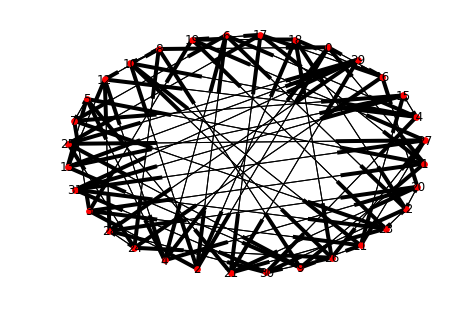

In [25]:
plt.clf()
G = nx.DiGraph(F)
nx.draw(G,node_size=32, with_labels=True)
plt.show()

In [23]:
G
